# Mini-Competition: One-Day Start to Finish Data Science Project

## The Task:
The task is to complete a full, start-to-finish data science project in one(ish) day, using the "best practice" skills we've learned over the past day of the course. 

## The Data:
The data shows real property information, including most recent sales price as of July 2018, for properties located Washington, D.C. The goal is to predict housing prices in DC. It is from [Kaggle](https://www.kaggle.com/christophercorrea/dc-residential-properties/version/7).

### Step 1: Exploration
- Explore the data and verify it, using tests of course! 
- At least 1 visualization of the data

### Step 2: Model Selection
- MUST use gridsearchCV in a pipeline!!

### Step 3: Production
- Once you've selected your desired model, put it (and the necessary feature engineering) in a pipeline. 
- Add at least 2 tests, including one for your final output!
- Bonus points if your predictor runs as its own python program from command line (rather than in a notebook).

Metric used to judge will be MAE (mean absolute error).
The team with the lowest MAE on the holdout test set at the end of Wednesday wins!

In [1]:
import pandas as pd

In [2]:
!pwd

/home/mathlizard/DSR_Model_Pipelines/DSR_Model_Pipelines_Course


In [3]:
df = pd.read_csv('data/DC_properties_training.csv', low_memory=False, index_col=0)

In [4]:
"""
BATHRMNumber of Full Bathrooms
HF_BATHRMNumber of Half Bathrooms (no bathtub or shower)
HEATHeating
ACCooling
NUM_UNITSNumber of Units
ROOMSNumber of Rooms
BEDRMNumber of Bedrooms
AYBThe earliest time the main portion of the building was built
YR_RMDLYear structure was remodeled
EYBThe year an improvement was built more recent than actual year built
STORIESNumber of stories in primary dwelling
SALEDATEDate of most recent sale
PRICEPrice of most recent sale
QUALIFIEDQualified
SALE_NUMSale Number
GBAGross building area in square feet
BLDG_NUMBuilding Number on Property
STYLEStyle
STRUCTStructure
GRADEGrade
CNDTNCondition
EXTWALLExtrerior wall
ROOFRoof type
INTWALLInterior wall
KITCHENSNumber of kitchens
FIREPLACESNumber of fireplaces
USECODEProperty use code
LANDAREALand area of property in square feet
GIS_LAST_MOD_DTTMLast Modified Date
SOURCERaw Data Source
CMPLX_NUMComplex number
LIVING_GBAGross building area in square feet
FULLADDRESSFull Street Address
CITYCity
STATEState
ZIPCODEZip Code
NATIONALGRIDAddress location national grid coordinate spatial address
LATITUDELatitude
LONGITUDELongitude
ASSESSMENT_NBHDNeighborhood ID
ASSESSMENT_SUBNBHDSubneighborhood ID
CENSUS_TRACTCensus tract
CENSUS_BLOCKCensus block
WARDWard (District is divided into eight wards, each with approximately 75,000 residents)
SQUARESquare (from SSL)
Xlongitude
Ylatitude
QUADRANTCity quadrant (NE,SE,SW,NW)"""

'\nBATHRMNumber of Full Bathrooms\nHF_BATHRMNumber of Half Bathrooms (no bathtub or shower)\nHEATHeating\nACCooling\nNUM_UNITSNumber of Units\nROOMSNumber of Rooms\nBEDRMNumber of Bedrooms\nAYBThe earliest time the main portion of the building was built\nYR_RMDLYear structure was remodeled\nEYBThe year an improvement was built more recent than actual year built\nSTORIESNumber of stories in primary dwelling\nSALEDATEDate of most recent sale\nPRICEPrice of most recent sale\nQUALIFIEDQualified\nSALE_NUMSale Number\nGBAGross building area in square feet\nBLDG_NUMBuilding Number on Property\nSTYLEStyle\nSTRUCTStructure\nGRADEGrade\nCNDTNCondition\nEXTWALLExtrerior wall\nROOFRoof type\nINTWALLInterior wall\nKITCHENSNumber of kitchens\nFIREPLACESNumber of fireplaces\nUSECODEProperty use code\nLANDAREALand area of property in square feet\nGIS_LAST_MOD_DTTMLast Modified Date\nSOURCERaw Data Source\nCMPLX_NUMComplex number\nLIVING_GBAGross building area in square feet\nFULLADDRESSFull Street Add

In [5]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
index,,,,,,,,,,,,,,,,,,,,,
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


In [6]:
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,157457.000000,157457.000000,105670.000000,157457.000000,157457.000000,157189.000000,80156.000000,157457.000000,105626.000000,9.730200e+04,...,157457.000000,157457.000000,51787.000000,51787.000000,157456.000000,157456.000000,157456.000000,157456.000000,157223.000000,157223.000000
mean,1.810850,0.458144,1.198145,6.187721,2.732232,1941.994643,1998.238123,1963.719409,2.089409,9.276499e+05,...,14.254228,2470.992754,2371.596926,889.020546,20012.698347,38.914841,-77.016657,5349.232611,-77.016693,38.914835
std,0.976347,0.587519,0.596824,2.617896,1.358976,33.643714,16.595809,24.924017,2.825090,7.033661e+06,...,3.727124,5022.626209,1114.435877,420.495711,15.649173,0.031717,0.040952,3369.841930,0.040947,0.031677
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,2.400000e+05,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042859,38.895432
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,3.999990e+05,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915281,-77.019589,5201.000000,-77.019503,38.915212
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,6.520000e+05,...,17.000000,3000.000000,2910.000000,1061.000000,20018.000000,38.936075,-76.988573,8302.000000,-76.988842,38.936077
max,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


# Visualize the Data

In [9]:
for i in df:
    print(i, df[i].isnull().sum())

BATHRM 0
HF_BATHRM 0
HEAT 0
AC 0
NUM_UNITS 51787
ROOMS 0
BEDRM 0
AYB 268
YR_RMDL 77301
EYB 0
STORIES 51831
SALEDATE 26506
PRICE 60155
QUALIFIED 0
SALE_NUM 0
GBA 51787
BLDG_NUM 0
STYLE 51787
STRUCT 51787
GRADE 51787
CNDTN 51787
EXTWALL 51787
ROOF 51787
INTWALL 51787
KITCHENS 51788
FIREPLACES 0
USECODE 0
LANDAREA 0
GIS_LAST_MOD_DTTM 0
SOURCE 0
CMPLX_NUM 105670
LIVING_GBA 105670
FULLADDRESS 52437
CITY 52426
STATE 52426
ZIPCODE 1
NATIONALGRID 52426
LATITUDE 1
LONGITUDE 1
ASSESSMENT_NBHD 1
ASSESSMENT_SUBNBHD 32246
CENSUS_TRACT 1
CENSUS_BLOCK 52426
WARD 1
SQUARE 0
X 234
Y 234
QUADRANT 234


In [15]:
df.shape

(157457, 24)

In [11]:
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,157457.000000,157457.000000,105670.000000,157457.000000,157457.000000,157189.000000,80156.000000,157457.000000,105626.000000,9.730200e+04,...,157457.000000,157457.000000,51787.000000,51787.000000,157456.000000,157456.000000,157456.000000,157456.000000,157223.000000,157223.000000
mean,1.810850,0.458144,1.198145,6.187721,2.732232,1941.994643,1998.238123,1963.719409,2.089409,9.276499e+05,...,14.254228,2470.992754,2371.596926,889.020546,20012.698347,38.914841,-77.016657,5349.232611,-77.016693,38.914835
std,0.976347,0.587519,0.596824,2.617896,1.358976,33.643714,16.595809,24.924017,2.825090,7.033661e+06,...,3.727124,5022.626209,1114.435877,420.495711,15.649173,0.031717,0.040952,3369.841930,0.040947,0.031677
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,2.400000e+05,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042859,38.895432
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,3.999990e+05,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915281,-77.019589,5201.000000,-77.019503,38.915212
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,6.520000e+05,...,17.000000,3000.000000,2910.000000,1061.000000,20018.000000,38.936075,-76.988573,8302.000000,-76.988842,38.936077
max,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [13]:
df_num_w_p = df.loc[df['PRICE'].notnull()]
df_num_wo_p = df.loc[df['PRICE'].isnull()]

In [15]:
df_num_w_p.shape[0] + df_num_wo_p.shape[0] == df.shape[0]

True

In [16]:
for i in df_num_with_p:
    print(i, df_num_with_p[i].isnull().sum())

BATHRM 0
HF_BATHRM 0
HEAT 0
AC 0
NUM_UNITS 39954
ROOMS 0
BEDRM 0
AYB 110
YR_RMDL 40175
EYB 0
STORIES 39987
SALEDATE 1
PRICE 0
QUALIFIED 0
SALE_NUM 0
GBA 39954
BLDG_NUM 0
STYLE 39954
STRUCT 39954
GRADE 39954
CNDTN 39954
EXTWALL 39954
ROOF 39954
INTWALL 39954
KITCHENS 39955
FIREPLACES 0
USECODE 0
LANDAREA 0
GIS_LAST_MOD_DTTM 0
SOURCE 0
CMPLX_NUM 57348
LIVING_GBA 57348
FULLADDRESS 40284
CITY 40280
STATE 40280
ZIPCODE 0
NATIONALGRID 40280
LATITUDE 0
LONGITUDE 0
ASSESSMENT_NBHD 0
ASSESSMENT_SUBNBHD 20063
CENSUS_TRACT 0
CENSUS_BLOCK 40280
WARD 0
SQUARE 0
X 100
Y 100
QUADRANT 100


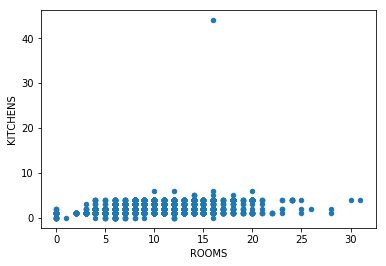

In [46]:
df_num_with_p.plot('ROOMS', 'KITCHENS', kind='scatter')

In [47]:
df_num_with_p['KITCHENS'].describe()

count    57347.000000
mean         1.251068
std          0.661441
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         44.000000
Name: KITCHENS, dtype: float64

In [48]:
df_num_with_p.iloc['KITCHENS' > 40]

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
df.columns

In [ ]:
df_cat.columns

In [ ]:
df_num.columns

In [ ]:
df['LATITUDE'].head()

In [ ]:
df['LONGITUDE'].head()

In [ ]:
df['NATIONALGRID'].head()

In [ ]:
df['X'].head()

In [ ]:
df['Y'].head()

In [ ]:
df['CNDTN'].unique()

In [18]:
rel_feats = ['BATHRM', 'ROOMS', 'YR_RMDL', 'AC', 'ZIPCODE', 'NATIONALGRID', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD'\
            , 'NUM_UNITS', 'SALEDATE', 'AYB', 'CNDTN', 'LANDAREA']

In [19]:
df_rel_feats = df[rel_feats]

In [20]:
num_cols = []
dis_cols = []
cat_cols = []
for i in df_rel_feats:
    if df_rel_feats[i].dtype == 'int64':
        dis_cols.append(i)
    if df_rel_feats[i].dtype == 'float64':
        num_cols.append(i)
    if df_rel_feats[i].dtype == 'object':
        if i == 'ADDRESS' or i == 'SALEDATE':
            pass
        else:
            cat_cols.append(i)

lab_col = ['ADDRESS', 'SALEDATE']

In [21]:
cat_cols

['AC', 'NATIONALGRID', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CNDTN']

In [22]:
num_cols

['YR_RMDL', 'ZIPCODE', 'NUM_UNITS', 'AYB']

In [23]:
df_rel_feats['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

/home/mathlizard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_rel_feats.shape

(157457, 13)

In [30]:
series_time = df_rel_feats['SALEDATE'].dropna()

In [31]:
df_rel_feats_1 = df_rel_feats.loc[series_time.index]

In [32]:
df_rel_feats_1

,BATHRM,ROOMS,YR_RMDL,AC,ZIPCODE,NATIONALGRID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,NUM_UNITS,SALEDATE,AYB,CNDTN,LANDAREA
index,,,,,,,,,,,,,
0,4,8,1988.0,Y,20009.0,18S UJ 23061 09289,Old City 2,040 D Old City 2,2.0,2003-11-25,1910.0,Good,1680
1,3,11,2007.0,Y,20009.0,18S UJ 23067 09289,Old City 2,040 D Old City 2,2.0,2000-08-17,1898.0,Good,1680
2,3,9,2009.0,Y,20009.0,18S UJ 23074 09289,Old City 2,040 D Old City 2,2.0,2016-06-21,1910.0,Very Good,1680
3,3,8,2003.0,Y,20009.0,18S UJ 23078 09288,Old City 2,040 D Old City 2,2.0,2006-07-12,1900.0,Good,1680
5,3,10,NaN,Y,20009.0,18S UJ 23157 09248,Old City 2,040 D Old City 2,1.0,2010-02-26,1913.0,Good,2196
6,1,5,1988.0,Y,20009.0,18S UJ 23042 09323,Old City 2,040 D Old City 2,2.0,2011-05-02,1917.0,Average,1261
7,3,8,2011.0,Y,20009.0,18S UJ 23124 09368,Old City 2,040 D Old City 2,2.0,2011-09-29,1906.0,Average,1627
8,3,7,2008.0,Y,20009.0,18S UJ 23142 09324,Old City 2,040 D Old City 2,2.0,2018-05-03,1908.0,Very Good,1424
9,1,6,1979.0,Y,20009.0,18S UJ 23127 09324,Old City 2,040 D Old City 2,1.0,2008-12-05,1908.0,Average,1424


In [33]:
sale_date = []
for i in df_rel_feats_1['SALEDATE']:
    year = i.year
    month = i.month
    sale_date.append(year + month/12)
    

In [34]:
sale_date

[2003.9166666666667,
 2000.6666666666667,
 2016.5,
 2006.5833333333333,
 2010.1666666666667,
 2011.4166666666667,
 2011.75,
 2018.4166666666667,
 2009.0,
 2009.25,
 2011.75,
 2010.9166666666667,
 2008.4166666666667,
 2016.6666666666667,
 2001.5833333333333,
 2016.0833333333333,
 2014.3333333333333,
 2006.0833333333333,
 2012.6666666666667,
 2012.5833333333333,
 1996.3333333333333,
 2005.3333333333333,
 2015.1666666666667,
 2014.0,
 2016.5,
 1999.25,
 2018.3333333333333,
 2017.5833333333333,
 1997.8333333333333,
 2006.6666666666667,
 2016.75,
 2015.75,
 2018.25,
 2017.4166666666667,
 2001.9166666666667,
 2011.25,
 2016.6666666666667,
 2000.0,
 2005.25,
 2009.8333333333333,
 2006.6666666666667,
 1997.75,
 2005.0,
 2014.3333333333333,
 2010.5833333333333,
 2000.25,
 2002.6666666666667,
 2014.25,
 2010.1666666666667,
 1995.8333333333333,
 1998.5,
 2012.75,
 1999.1666666666667,
 2005.0833333333333,
 2007.25,
 2014.8333333333333,
 2009.5,
 2011.0,
 2017.0833333333333,
 2005.6666666666667,
 1

In [35]:
len(sale_date)

130951

In [36]:
df_rel_feats_1.shape

(130951, 13)

In [37]:
df_rel_feats_1['SALEDATE_1'] = sale_date

In [38]:
df_rel_feats_1 = df_rel_feats_1.drop('SALEDATE', axis=1)

In [39]:
df_rel_feats_1['SALEDATE_1']

index
0         2003.916667
1         2000.666667
2         2016.500000
3         2006.583333
5         2010.166667
6         2011.416667
7         2011.750000
8         2018.416667
9         2009.000000
11        2009.250000
14        2011.750000
16        2010.916667
17        2008.416667
18        2016.666667
19        2001.583333
20        2016.083333
21        2014.333333
22        2006.083333
23        2012.666667
24        2012.583333
25        1996.333333
27        2005.333333
28        2015.166667
29        2014.000000
31        2016.500000
32        1999.250000
34        2018.333333
35        2017.583333
37        1997.833333
40        2006.666667
             ...     
158921    2017.333333
158924    2004.916667
158926    2014.500000
158927    2015.833333
158928    2017.416667
158929    2013.000000
158930    2007.500000
158931    2005.583333
158932    2014.583333
158933    2017.083333
158934    2017.166667
158935    2017.000000
158936    2017.000000
158938    2015.250000
1589

In [40]:
df_rel_feats_1.head()

,BATHRM,ROOMS,YR_RMDL,AC,ZIPCODE,NATIONALGRID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,NUM_UNITS,AYB,CNDTN,LANDAREA,SALEDATE_1
index,,,,,,,,,,,,,
0,4,8,1988.0,Y,20009.0,18S UJ 23061 09289,Old City 2,040 D Old City 2,2.0,1910.0,Good,1680,2003.916667
1,3,11,2007.0,Y,20009.0,18S UJ 23067 09289,Old City 2,040 D Old City 2,2.0,1898.0,Good,1680,2000.666667
2,3,9,2009.0,Y,20009.0,18S UJ 23074 09289,Old City 2,040 D Old City 2,2.0,1910.0,Very Good,1680,2016.500000
3,3,8,2003.0,Y,20009.0,18S UJ 23078 09288,Old City 2,040 D Old City 2,2.0,1900.0,Good,1680,2006.583333
5,3,10,NaN,Y,20009.0,18S UJ 23157 09248,Old City 2,040 D Old City 2,1.0,1913.0,Good,2196,2010.166667


In [69]:
cat_cols

['AC', 'NATIONALGRID', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CNDTN']

In [70]:
dis_cols

['BATHRM', 'ROOMS', 'LANDAREA']

In [71]:
num_cols

['YR_RMDL', 'ZIPCODE', 'NUM_UNITS', 'AYB']

In [41]:
lab_col.append('NATIONALGRID')

In [42]:
cat_cols = ['AC', 'CNDTN']

In [ ]:
df_rel_feats_1

In [72]:
for i in df_rel_feats_1[cat_cols]:
    print(df[i].unique().shape,df[i].unique())

(3,) ['Y' 'N' '0']
(58,) ['Old City 2' 'Foggy Bottom' 'Central-tri 1' 'Old City 1'
 'Southwest Waterfront' 'Capitol Hill' 'Georgetown' 'Glover Park'
 'Burleith' 'Palisades' 'Berkley' 'Foxhall' 'Kent' 'Wesley Heights'
 'American University' 'Spring Valley' 'Chevy Chase'
 'North Cleveland Park' 'Wakefield' 'Cleveland Park' 'Observatory Circle'
 'Forest Hills' 'Massachusetts Avenue Heights' 'Woodley' 'Takoma Park'
 'Rock Creek Park' 'Kalorama' 'Garfield' 'Hawthorne' 'Mt. Pleasant'
 'Crestwood' 'Columbia Heights' '16th Street Heights' 'Brightwood'
 'Shepherd Heights' 'Colonial Village' 'Petworth' 'Ledroit Park'
 'Eckington' 'Chillum' 'Brookland' 'Riggs Park' 'Brentwood' 'Trinidad'
 'Woodridge' 'Michigan Park' 'Fort Lincoln' 'Lily Ponds' 'Deanwood'
 'Marshall Heights' 'Fort Dupont Park' 'Hillcrest' 'Anacostia'
 'Randle Heights' 'Barry Farms' 'Congress Heights' nan 'Central-tri 3']
(122,) ['040 D Old City 2' '040 E Old City 2' nan '040 C Old City 2'
 '040 F Old City 2' '040 G Old City 2' '04

In [60]:
abbr_subnbhd = []
for i in df_rel_feats_1['ASSESSMENT_SUBNBHD']:
    try:
        abbr_subnbhd.append(i[:5])
    except:
        pass
    

In [77]:
df_rel_feats_1.shape

(130951, 13)

In [99]:
df_rel_feats_2 = df_rel_feats_1.dropna().drop_duplicates()

In [100]:
abbr_subnbhd = []
for i in df_rel_feats_2['ASSESSMENT_SUBNBHD']:
    try:
        abbr_subnbhd.append(i[:5])
    except:
        pass
    

In [101]:
len(abbr_subnbhd)

36909

In [102]:
df_rel_feats_2.shape

(36909, 13)

In [103]:
df_rel_feats_2['SUBNBHD'] = abbr_subnbhd

In [104]:
df_rel_feats_2 = df_rel_feats_2.drop(['ASSESSMENT_SUBNBHD', 'ASSESSMENT_NBHD'], axis = 1)

In [148]:
y_train = df.loc[df_rel_feats_2.index]['PRICE']

In [140]:
x_train = df_rel_feats_2

In [141]:
y_train.shape[0] == x_train.shape[0]

True

In [154]:
df_rel_feats_2=x_train.insert(0, column = 'y_train', value= y_train)

ValueError: cannot insert y_train, already exists

In [155]:
df_rel_feats_2

,y_train,BATHRM,ROOMS,YR_RMDL,AC,ZIPCODE,NUM_UNITS,AYB,CNDTN,LANDAREA,SALEDATE_1,SUBNBHD,ABBR_NAT_GRID
index,,,,,,,,,,,,,
0,1095000.0,4,8,1988.0,Y,20009.0,2.0,1910.0,Good,1680,2003.916667,040 D,J 23061 09289
1,NaN,3,11,2007.0,Y,20009.0,2.0,1898.0,Good,1680,2000.666667,040 D,J 23067 09289
2,2100000.0,3,9,2009.0,Y,20009.0,2.0,1910.0,Very Good,1680,2016.500000,040 D,J 23074 09289
3,1602000.0,3,8,2003.0,Y,20009.0,2.0,1900.0,Good,1680,2006.583333,040 D,J 23078 09288
6,NaN,1,5,1988.0,Y,20009.0,2.0,1917.0,Average,1261,2011.416667,040 D,J 23042 09323
7,1050000.0,3,8,2011.0,Y,20009.0,2.0,1906.0,Average,1627,2011.750000,040 D,J 23124 09368
8,1430000.0,3,7,2008.0,Y,20009.0,2.0,1908.0,Very Good,1424,2018.416667,040 D,J 23142 09324
9,NaN,1,6,1979.0,Y,20009.0,1.0,1908.0,Average,1424,2009.000000,040 D,J 23127 09324
14,1325000.0,3,5,2000.0,Y,20009.0,2.0,1917.0,Very Good,1815,2011.750000,040 D,J 23158 09326


In [159]:
df_rel_feats_2 = df_rel_feats_2.dropna()

In [161]:
.8 * df_rel_feats_2.shape[0]

22932.0

In [176]:
df_shuffled = df_rel_feats_2.loc[np.random.permutation(df_rel_feats_2.index)]

df_train = df_shuffled.iloc[:int(df_shuffled.shape[0]*0.8)]
df_val = df_shuffled.iloc[int(df_shuffled.shape[0]*0.8):]

In [177]:
df_train.shape[0] + df_val.shape[0] == df_shuffled.shape[0]

True

In [178]:
df_train.shape[0] + df_val.shape[0] == df_rel_feats_2.shape[0]

True

In [180]:
df_train.columns

Index(['y_train', 'BATHRM', 'ROOMS', 'YR_RMDL', 'AC', 'ZIPCODE', 'NUM_UNITS',
       'AYB', 'CNDTN', 'LANDAREA', 'SALEDATE_1', 'SUBNBHD', 'ABBR_NAT_GRID'],
      dtype='object')

In [181]:
y_train = df_train['y_train']
x_train = df_train.drop('y_train', axis = 1)

In [182]:
y_val = df_val['y_train']
x_val = df_val.drop('y_train', axis = 1)

In [106]:
abbr_natgrid = []
for i in df_rel_feats_2['NATIONALGRID']:
    try:
        abbr_natgrid.append(i[5:])
    except:
        pass

In [107]:
df_rel_feats_2['ABBR_NAT_GRID'] = abbr_natgrid

In [63]:
import numpy as np

In [109]:
df_rel_feats_2 = df_rel_feats_2.drop(['NATIONALGRID'], axis = 1)

In [114]:
lab_cols = ['ABBR_NAT_GRID', 'SUBNBHD']

In [130]:
cat_cols =['AC', 'CNDTN']

In [116]:
num_cols = ['YR_RMDL', 'AYB', 'SALEDATE_1', 'LANDAREA']

In [117]:
dis_cols = ['BATHRM', 'ROOMS', 'ZIPCODE', 'NUM_UNITS']

In [184]:
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders.one_hot import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Imputer
from category_encoders.ordinal import OrdinalEncoder

In [131]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x.loc[:,self.columns]


one_hot_encode_selector = ColumnSelector(cat_cols)
one_hot_encode_df = one_hot_encode_selector.fit_transform(df_rel_feats_2)


In [185]:
lab_cols

['ABBR_NAT_GRID', 'SUBNBHD']

In [186]:
label_encode_selector = ColumnSelector(lab_cols)
label_encode_df = label_encode_selector.fit_transform(x_train)

In [187]:
%%run_pytest 

def test_LabelEncoder():
    encoder = OrdinalEncoder()
    encoded_df = encoder.fit_transform(label_encode_df.values)
    
    # check for data leakage
    assert encoded_df.shape[0] == label_encode_df.shape[0]
    
    # check that all values have been converted into integers
    assert encoded_df.values.dtype == 'int64'

============================== test session starts ==============================
platform linux -- Python 3.6.5, pytest-3.8.2, py-1.5.3, pluggy-0.7.1
rootdir: /home/mathlizard/DSR_Model_Pipelines/DSR_Model_Pipelines_Course, inifile:
plugins: remotedata-0.2.1, openfiles-0.3.0, doctestplus-0.1.3, arraydiff-0.2, palladium-1.2.0
collected 2 items

Mini-Competition with Pipelines.py ..                                     [100%]

=============================== warnings summary ================================
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already imported so cannot be rewritten: pytest_remotedata
  self.config,
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already imported so cannot be rewritten: pytest_openfiles
  self.config,
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already i

In [132]:
one_hot = OneHotEncoder()
one_hot_encoded_df = one_hot.fit_transform(one_hot_encode_df.values)

In [133]:
import ipytest.magics
import pytest
# set the file name (required)
__file__ = 'Mini-Competition with Pipelines.ipynb'

In [134]:
one_hot_encoded_df.dtypes.all()

dtype('int64')

In [135]:
%%run_pytest

def test_OneHotEncoder():
    encoder = OneHotEncoder()
    one_hot_encoded_df = encoder.fit_transform(one_hot_encode_df.values)
    
    assert one_hot_encoded_df.shape[0] == one_hot_encode_df.shape[0]
    
    assert one_hot_encoded_df.dtypes.all() == 'int64'
    
    assert ((one_hot_encoded_df.values ==0) | (one_hot_encoded_df.values ==1)).all()
    
    assert one_hot_encoded_df.shape[1] == len(set(one_hot_encoded_df))

============================== test session starts ==============================
platform linux -- Python 3.6.5, pytest-3.8.2, py-1.5.3, pluggy-0.7.1
rootdir: /home/mathlizard/DSR_Model_Pipelines/DSR_Model_Pipelines_Course, inifile:
plugins: remotedata-0.2.1, openfiles-0.3.0, doctestplus-0.1.3, arraydiff-0.2, palladium-1.2.0
collected 1 item

Mini-Competition with Pipelines.py .                                      [100%]

=============================== warnings summary ================================
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already imported so cannot be rewritten: pytest_remotedata
  self.config,
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already imported so cannot be rewritten: pytest_openfiles
  self.config,
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already im

In [183]:
numeric_selector = ColumnSelector(num_cols)
numeric_df = numeric_selector.fit_transform(x_train)
numeric_df.head()

,YR_RMDL,AYB,SALEDATE_1,LANDAREA
index,,,,
49750,2009.0,1920.0,2013.333333,4877
8712,1992.0,1910.0,2015.583333,1828
86444,2018.0,1946.0,2018.250000,2370
59571,2005.0,1907.0,2016.500000,1500
30465,1989.0,1937.0,2016.250000,4500


In [189]:
discrete_selector = ColumnSelector(dis_cols)
discrete_df = discrete_selector.fit_transform(x_train)

In [191]:
numeric_df.head()

,YR_RMDL,AYB,SALEDATE_1,LANDAREA
index,,,,
49750,2009.0,1920.0,2013.333333,4877
8712,1992.0,1910.0,2015.583333,1828
86444,2018.0,1946.0,2018.250000,2370
59571,2005.0,1907.0,2016.500000,1500
30465,1989.0,1937.0,2016.250000,4500


In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_df)

In [193]:
%%run_pytest[clean]

def test_standardscaler():
    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(numeric_df)
    
    assert np.isclose(scaled_numeric.mean(), 0)
    assert np.isclose(scaled_numeric.std(), 1)

============================== test session starts ==============================
platform linux -- Python 3.6.5, pytest-3.8.2, py-1.5.3, pluggy-0.7.1
rootdir: /home/mathlizard/DSR_Model_Pipelines/DSR_Model_Pipelines_Course, inifile:
plugins: remotedata-0.2.1, openfiles-0.3.0, doctestplus-0.1.3, arraydiff-0.2, palladium-1.2.0
collected 1 item

Mini-Competition with Pipelines.py .                                      [100%]

=============================== warnings summary ================================
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already imported so cannot be rewritten: pytest_remotedata
  self.config,
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already imported so cannot be rewritten: pytest_openfiles
  self.config,
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already im

In [194]:
x_train.columns

Index(['BATHRM', 'ROOMS', 'YR_RMDL', 'AC', 'ZIPCODE', 'NUM_UNITS', 'AYB',
       'CNDTN', 'LANDAREA', 'SALEDATE_1', 'SUBNBHD', 'ABBR_NAT_GRID'],
      dtype='object')

In [195]:
x_val.columns

Index(['BATHRM', 'ROOMS', 'YR_RMDL', 'AC', 'ZIPCODE', 'NUM_UNITS', 'AYB',
       'CNDTN', 'LANDAREA', 'SALEDATE_1', 'SUBNBHD', 'ABBR_NAT_GRID'],
      dtype='object')

In [196]:
from pandas.api.types import is_numeric_dtype

import warnings
warnings.filterwarnings("ignore")

In [314]:
df = pd.read_csv('data/holdout_test_data.csv', low_memory=False, index_col=0)

In [410]:
df["PRICE"].isnull().sum()

586

In [406]:
df['ASSESSMENT_SUBNBHD']

157457              028 B Hillcrest
157458              056 B Woodridge
157459       016 C Congress Heights
157460                          NaN
157461             039 L Old City 1
157462               042 B Petworth
157463                          NaN
157464             040 C Old City 2
157465             006 D Brightwood
157466    049 B 16th Street Heights
157467         054 B Wesley Heights
157468             039 L Old City 1
157469                          NaN
157470              019 A Eckington
157471             040 C Old City 2
157472               042 C Petworth
157473       015 A Columbia Heights
157474                          NaN
157475             040 E Old City 2
157476                          NaN
157477             006 B Brightwood
157478                          NaN
157479    001 C American University
157480           036 B Mt. Pleasant
157481       016 B Congress Heights
157482       015 D Columbia Heights
157483             040 A Old City 2
157484                      

In [409]:
df_2['SUBNBHD'].unique().shape

(119,)

In [319]:
df.dropna().shape

(0, 49)

In [347]:
all_columns = list(df.columns)
df_2 = df.copy()
df_2['SALEDATE_1'] = pd.to_datetime(df['SALEDATE'])
series_time = df_2['SALEDATE_1'].dropna()
df_2 = df_2.loc[series_time.index]
sale_date = []

for i in df_2['SALEDATE_1']:
    year = i.year
    month = i.month
    sale_date.append(year + month/12)
df_2 = df_2.drop('SALEDATE', axis=1)
df_2['SALEDATE_1'] = sale_date


abbr_subnbhd = []
for i in df_2['ASSESSMENT_SUBNBHD']:
    try:
        abbr_subnbhd.append(i[:5])
    except:
        abbr_subnbhd.append(0)
    
df_2['SUBNBHD'] = abbr_subnbhd
df_2 = df_2.drop(['ASSESSMENT_SUBNBHD', 'ASSESSMENT_NBHD'], axis = 1)


abbr_natgrid = []
for i in df_2['NATIONALGRID']:
    try:
        abbr_natgrid.append(i[5:])
    except:
        abbr_natgrid.append('a')

df_2['ABBR_NAT_GRID'] = abbr_natgrid


In [349]:
df_3 = df_2[features.columns]

In [336]:
target = df_2['PRICE']

In [337]:
df_3.shape

(1236, 12)

In [338]:
target.shape

(1236,)

In [350]:
features = df_3.copy()

In [346]:
features.head()

,BATHRM,ROOMS,YR_RMDL,AC,ZIPCODE,NUM_UNITS,AYB,CNDTN,LANDAREA,SALEDATE_1,SUBNBHD,ABBR_NAT_GRID
157457,2,7,2007.0,Y,20020.0,1.0,1951.0,Good,5160,2008-04-17,028 B,J 30786 04245
157458,1,7,NaN,Y,20018.0,1.0,1922.0,Average,14280,2001-04-24,056 B,J 29464 10752
157459,1,3,2006.0,Y,20032.0,NaN,1953.0,NaN,564,2006-11-03,016 C,a
157460,3,6,NaN,Y,20018.0,1.0,2013.0,Very Good,1611,2013-12-13,0,J 30717 10113
157461,2,4,2015.0,Y,20002.0,NaN,1924.0,NaN,554,2016-07-05,039 L,a


In [335]:
df_2.head()

,index,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,SALEDATE_1,SUBNBHD,ABBR_NAT_GRID
157457,94815,2,2,Ht Pump,Y,1.0,7,4,1951.0,2007.0,...,9901.0,009901 2024,Ward 7,5530,-76.950183,38.870755,SE,2008-04-17,028 B,J 30786 04245
157458,78443,1,1,Warm Cool,Y,1.0,7,3,1922.0,NaN,...,11100.0,011100 1035,Ward 5,4339,-76.967326,38.928483,NE,2001-04-24,056 B,J 29464 10752
157459,109262,1,0,Ht Pump,Y,NaN,3,1,1953.0,2006.0,...,9802.0,NaN,Ward 8,6163,-76.996873,38.830307,SE,2006-11-03,016 C,a
157460,78370,3,1,Forced Air,Y,1.0,6,3,2013.0,NaN,...,9000.0,009000 1001,Ward 5,4327,-76.953987,38.923362,NE,2013-12-13,0,J 30717 10113
157461,148040,2,1,Ht Pump,Y,NaN,4,2,1924.0,2015.0,...,10600.0,NaN,Ward 6,0855,-76.997428,38.904712,NE,2016-07-05,039 L,a


In [199]:
from sklearn.pipeline import make_pipeline, make_union

# process the numeric and categorical columns.
# then, join them all together.

processing_pipeline = make_pipeline(
    # If using make_union, then we HAVE to first select all the columns we will pull from.
    ColumnSelector(all_columns),
    make_union(
        # First, we select and 'hold out' the binary variables, as we wont do any further work to them.
        make_pipeline(ColumnSelector(dis_cols),
        ),
        # Pipeline for numeric features
        make_pipeline(
            ColumnSelector(num_cols),
            StandardScaler()
        ),
        # Pipeline for label encoded features
        make_pipeline(
            ColumnSelector(lab_cols),
            OrdinalEncoder()
        ),
        
        # Pipeline for one-hot-encoded features
        make_pipeline(
            ColumnSelector(cat_cols),
            OneHotEncoder()
        )
    )
)

In [392]:
target = df['PRICE']

In [343]:
target.shape

(1236,)

In [354]:
features = features.dropna()

In [367]:
features.shape

(412, 12)

In [368]:
target.shape

(412,)

In [356]:
features.index

Int64Index([157457, 157462, 157465, 157468, 157475, 157477, 157479, 157480,
            157482, 157483,
            ...
            158925, 158933, 158934, 158940, 158941, 158942, 158949, 158952,
            158954, 158955],
           dtype='int64', length=412)

In [393]:
target = target.loc[features.index]

In [394]:
target = target.dropna()

features = features.loc[target.index]

In [395]:
target.shape

(322,)

In [396]:
features.shape

(322, 12)

In [340]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [204]:
x_train

,BATHRM,ROOMS,YR_RMDL,AC,ZIPCODE,NUM_UNITS,AYB,CNDTN,LANDAREA,SALEDATE_1,SUBNBHD,ABBR_NAT_GRID
index,,,,,,,,,,,,
11558,2,7,1988.0,Y,20003.0,1.0,1967.0,Average,1614,2004.083333,039 C,J 27078 05329
26139,2,8,2011.0,Y,20016.0,1.0,1951.0,Average,6210,2009.333333,050 B,J 18516 12323
28629,4,10,2010.0,Y,20016.0,1.0,1926.0,Very Good,12635,2009.583333,054 A,J 18985 11083
73171,3,8,2017.0,Y,20017.0,1.0,1942.0,Good,1984,2018.250000,007 B,J 27296 12771
52437,2,6,2008.0,Y,20012.0,1.0,1921.0,Very Good,5148,2007.083333,006 B,J 24606 15897
26581,4,10,1999.0,Y,20016.0,1.0,1939.0,Good,12165,2018.083333,050 C,J 17911 12056
40815,2,6,2012.0,Y,20010.0,1.0,1948.0,Good,1600,2012.166667,036 B,J 22914 10841
69249,2,4,2015.0,Y,20017.0,1.0,1948.0,Good,1655,2014.500000,007 B,J 26865 13114
96758,1,6,2005.0,Y,20020.0,1.0,1932.0,Average,3688,2005.666667,028 C,J 29830 03041


In [397]:
processed = processing_pipeline.fit_transform(features)

In [398]:
%%run_pytest[clean]

def test_processingpipeline():
    # remember, this first pipeline only acts on the features, not the target.
    processed = processing_pipeline.fit_transform(features)
    
    # check for data leakage
    assert features.shape[0] == processed.shape[0]

============================== test session starts ==============================
platform linux -- Python 3.6.5, pytest-3.8.2, py-1.5.3, pluggy-0.7.1
rootdir: /home/mathlizard/DSR_Model_Pipelines/DSR_Model_Pipelines_Course, inifile:
plugins: remotedata-0.2.1, openfiles-0.3.0, doctestplus-0.1.3, arraydiff-0.2, palladium-1.2.0
collected 1 item

Mini-Competition with Pipelines.py .                                      [100%]

=============================== warnings summary ================================
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already imported so cannot be rewritten: pytest_remotedata
  self.config,
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already imported so cannot be rewritten: pytest_openfiles
  self.config,
/home/mathlizard/anaconda3/lib/python3.6/site-packages/_pytest/assertion/rewrite.py:268: PytestWarning: Module already im

In [399]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from math import sqrt
import matplotlib.pyplot as plt

In [400]:
finalpipeline = (make_pipeline(processing_pipeline, GradientBoostingRegressor()))
# Fitting the pipeline
finalpipeline.fit(features, target)

Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('columnselector', ColumnSelector(columns=['BATHRM', 'ROOMS', 'YR_RMDL', 'AC', 'ZIPCODE', 'NUM_UNITS', 'AYB', 'CNDTN', 'LANDAREA', 'SALEDATE_1', 'SUBNBHD', 'ABBR_NAT_GRID'])), ('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pip...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))])

In [401]:
mean_price = df['PRICE'].mean()

In [402]:
mean_price

1325421.3216630197

In [403]:
target = target.reset_index()
target.drop('index', axis=1, inplace=True)
target
target.shape

(322, 1)

In [404]:
def compare_predictions(x, y, finalpipeline, mean_target_value):
    # generate predictions:
    # Note: finalpipeline must have already been fit.


    predictions = finalpipeline.predict(x)
    y = y.reset_index()
    y.drop('index', axis=1, inplace=True)
    
    # a "lazy prediction" is where we return the average value of the target for every prediction.
    lazy_predictions = np.full(predictions.shape, mean_price)
    
    final_predictions = pd.DataFrame(pd.concat([y, 
                                                pd.Series(predictions), 
                                                pd.Series(lazy_predictions)], axis=1))
    final_predictions.rename(columns={'PRICE': 'True values',
                                      0: 'Predicted values',
                                      1: 'Lazy Predicted values'}, inplace=True)
    
    rmse_lazy = sqrt(mean_squared_error(y, lazy_predictions))
    mae_lazy = mean_absolute_error(y, lazy_predictions)
    r2_lazy = r2_score(y, lazy_predictions)
    
    rmse = sqrt(mean_squared_error(y, predictions))
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    
    print('RMSE Lazy Predictor', rmse_lazy)
    print('MAE Lazy Predictor', mae_lazy)
    print('R^2 Lazy Predictor', r2_lazy)
    print()
    print('RMSE', rmse)
    print('MAE', mae)
    print('R^2', r2)
    print()
    print('RMSE Improvement:', rmse_lazy - rmse)
    print('MAE Inprovement:', mae_lazy - mae)
    print('R^2 Improvement:', abs(r2_lazy - r2))
    
    
    plt.figure(figsize=(20,10))

    plt.plot(final_predictions.index, final_predictions['True values'], c='red', label='True Values')
    # plot a second data series 'Short students' in blue using the last three elements of x and y 
    plt.plot(final_predictions.index, final_predictions['Predicted values'], c='blue', label='Predicted Values')
    plt.plot(final_predictions.index, final_predictions['Lazy Predicted values'], c='black', label='Lazy Predicted Values')
    plt.legend(loc='best')
    plt.show()
    return predictions

RMSE Lazy Predictor 949698.0855847303
MAE Lazy Predictor 824638.6386098919
R^2 Lazy Predictor -0.813342614066876

RMSE 130893.94056486747
MAE 95588.16657977772
R^2 0.9655532837744327

RMSE Improvement: 818804.1450198628
MAE Inprovement: 729050.4720301141
R^2 Improvement: 1.7788958978413087


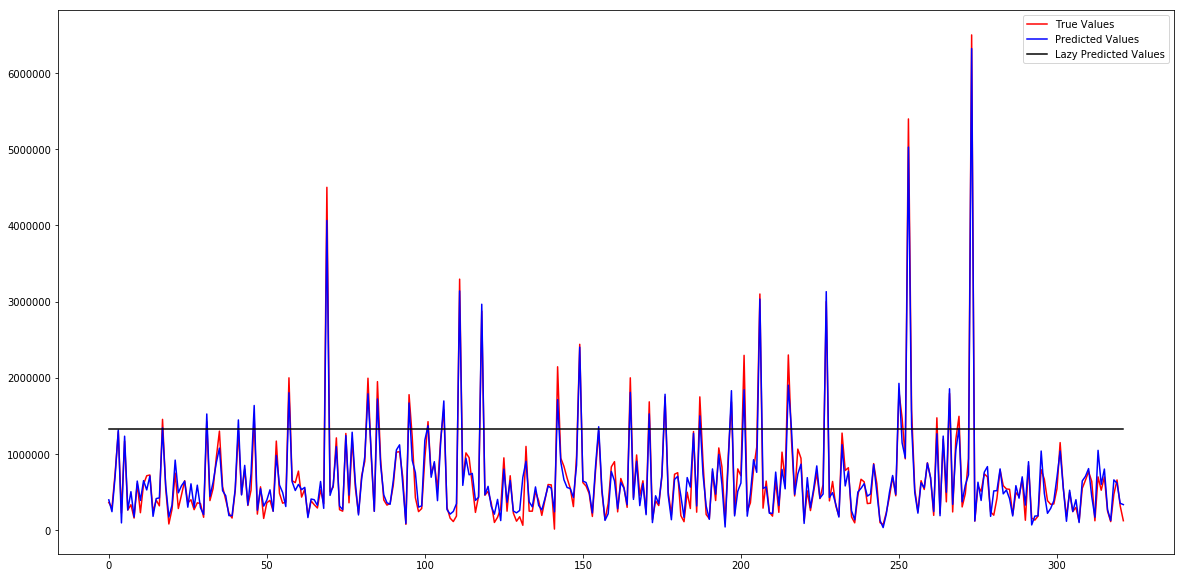

In [405]:
predictions_train = compare_predictions(features, target, finalpipeline, mean_price)

In [234]:
x_test.shape

(5733, 12)

In [235]:
x_train.shape

(22932, 12)

In [255]:
finalpipeline.named_steps[1]

KeyError: 1

In [241]:
finalpipeline.named_steps['randomforestregressor'].feature_importances_

array([2.71473509e-01, 4.12606486e-02, 1.54741593e-01, 3.27349578e-02,
       3.47978268e-02, 7.13144905e-02, 1.27116391e-01, 1.62038195e-01,
       2.11587163e-02, 4.29430126e-02, 2.87478999e-03, 1.93159030e-03,
       6.33330834e-07, 0.00000000e+00, 4.46468295e-03, 2.48123510e-02,
       3.00117091e-03, 3.72131139e-05, 2.42552156e-03, 6.04881309e-07,
       8.72101383e-04, 0.00000000e+00])

In [262]:
finalpipeline.named_steps

{'pipeline': Pipeline(memory=None,
      steps=[('columnselector', ColumnSelector(columns=['BATHRM', 'ROOMS', 'YR_RMDL', 'AC', 'ZIPCODE', 'NUM_UNITS', 'AYB', 'CNDTN', 'LANDAREA', 'SALEDATE_1', 'SUBNBHD', 'ABBR_NAT_GRID'])), ('featureunion', FeatureUnion(n_jobs=1,
        transformer_list=[('pipeline-1', Pipeline(memory=None,
      steps=[('c...rue, return_df=True,
        use_cat_names=False, verbose=0))]))],
        transformer_weights=None))]),
 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False)}

In [264]:
finalpipeline.named_steps['pipeline'].steps

[('columnselector',
  ColumnSelector(columns=['BATHRM', 'ROOMS', 'YR_RMDL', 'AC', 'ZIPCODE', 'NUM_UNITS', 'AYB', 'CNDTN', 'LANDAREA', 'SALEDATE_1', 'SUBNBHD', 'ABBR_NAT_GRID'])),
 ('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('pipeline-1', Pipeline(memory=None,
       steps=[('columnselector', ColumnSelector(columns=['BATHRM', 'ROOMS', 'ZIPCODE', 'NUM_UNITS']))])), ('pipeline-2', Pipeline(memory=None,
       steps=[('columnselector', ColumnSelector(columns=['YR_RMDL', 'AYB', 'SALEDATE_1', 'LANDAREA'])), ('...e_unknown='impute', impute_missing=True, return_df=True,
         use_cat_names=False, verbose=0))]))],
         transformer_weights=None))]

In [243]:
x_train.columns

Index(['BATHRM', 'ROOMS', 'YR_RMDL', 'AC', 'ZIPCODE', 'NUM_UNITS', 'AYB',
       'CNDTN', 'LANDAREA', 'SALEDATE_1', 'SUBNBHD', 'ABBR_NAT_GRID'],
      dtype='object')

In [244]:
cat_cols

['AC', 'CNDTN']

In [248]:
len(x_train.columns)

12

In [245]:
x_train['AC'].unique()

array(['Y', 'N', '0'], dtype=object)

In [247]:
x_train['CNDTN'].unique()

array(['Average', 'Very Good', 'Good', 'Fair', 'Excellent', 'Poor',
       'Default'], dtype=object)

In [ ]:
# Number of trees in random forest
n_estimators = [15,20,25,30]
# Number of features to consider at every split
max_features = [2,5, 10,'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, 10)]
# max_depth.append(None)
learning_rate = [0.01, 0.05, 0.06,0.07]

# Create the random grid
random_grid = {#'adaboostclassifier__base_estimator': ['DTC'],
               'adaboostclassifier__n_estimators': n_estimators,
               'adaboostclassifier__base_estimator__max_depth': max_depth,
                'adaboostclassifier__learning_rate': learning_rate
    
              }

print(random_grid)

In [223]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV


In [ ]:
print("Grid search")
print('\n')

params = random_grid
scoring = 'neg_mean_absolute_error'
clf = GridSearchCV(finalpipeline, params, verbose=True, scoring=scoring)
clf.fit(x_train, y_train)

clf_preds = clf.predict(x_test)
clf_preds = pd.Series(clf_preds)
clf_preds = clf_preds.rename("Grid Search Predicted values")

best_params = sorted(clf.grid_scores_, key=lambda x: -x[1])

In [ ]:
best_params[0:10]

__________________________________________________________________________________________

## Model 2 
* add more features
* interpolate nulls


BATHRMNumber of Full Bathrooms
HF_BATHRMNumber of Half Bathrooms (no bathtub or shower)
HEATHeating
ACCooling
NUM_UNITSNumber of Units
ROOMSNumber of Rooms
BEDRMNumber of Bedrooms
AYBThe earliest time the main portion of the building was built
YR_RMDLYear structure was remodeled
EYBThe year an improvement was built more recent than actual year built
STORIESNumber of stories in primary dwelling
SALEDATEDate of most recent sale
PRICEPrice of most recent sale
QUALIFIEDQualified
SALE_NUMSale Number
GBAGross building area in square feet
BLDG_NUMBuilding Number on Property
STYLEStyle
STRUCTStructure
GRADEGrade
CNDTNCondition
EXTWALLExtrerior wall
ROOFRoof type
INTWALLInterior wall
KITCHENSNumber of kitchens
FIREPLACESNumber of fireplaces
USECODEProperty use code
LANDAREALand area of property in square feet
GIS_LAST_MOD_DTTMLast Modified Date
SOURCERaw Data Source
CMPLX_NUMComplex number
LIVING_GBAGross building area in square feet
FULLADDRESSFull Street Address
CITYCity
STATEState
ZIPCODEZip Code
NATIONALGRIDAddress location national grid coordinate spatial address
LATITUDELatitude
LONGITUDELongitude
ASSESSMENT_NBHDNeighborhood ID
ASSESSMENT_SUBNBHDSubneighborhood ID
CENSUS_TRACTCensus tract
CENSUS_BLOCKCensus block
WARDWard (District is divided into eight wards, each with approximately 75,000 residents)
SQUARESquare (from SSL)
Xlongitude
Ylatitude
QUADRANTCity quadrant (NE,SE,SW,NW)


In [265]:
df.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [287]:
df['FIREPLACES'].head()

index
0    5
1    4
2    4
3    3
4    0
Name: FIREPLACES, dtype: int64

In [288]:
df['LIVING_GBA']

index
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
           ...  
158926     772.0
158927    1342.0
158928    1100.0
158929    1130.0
158930     990.0
158931     920.0
158932     942.0
158933     795.0
158934     671.0
158935     551.0
158936     644.0
158938    1413.0
158939     825.0
158940    1413.0
158941     861.0
158942    1492.0
158943    1838.0
158944    1938.0
158945     659.0
158946     818.0
158947     809.0
158948     934.0
158949    1123.0
158950    1330.0
158951    1413.0
158952     639.0
158953     820.0
158954  

In [267]:
df['LANDAREA'].head()

index
0    1680
1    1680
2    1680
3    1680
4    2032
Name: LANDAREA, dtype: int64

In [283]:
df['STYLE'].unique()

array(['3 Story', '4 Story', '2 Story', '2.5 Story Fin', '3.5 Story Fin',
       '1 Story', '1.5 Story Fin', '2.5 Story Unfin', '3.5 Story Unfin',
       'Default', '1.5 Story Unfin', '4.5 Story Fin', 'Split Level',
       'Bi-Level', 'Split Foyer', 'Vacant', 'Outbuildings',
       '4.5 Story Unfin', nan], dtype=object)

In [284]:
df['STORIES'].unique()

array([3.00e+00, 4.00e+00, 2.00e+00, 2.50e+00, 2.25e+00, 3.50e+00,
       1.00e+00,      nan, 3.25e+00, 1.50e+00, 2.75e+00, 7.00e+00,
       6.50e+01, 2.70e+00, 0.00e+00, 8.26e+02, 6.00e+00, 2.30e+00,
       5.00e+00, 2.20e+00, 3.70e+00, 1.70e+00, 3.20e+00, 1.75e+00,
       3.75e+00, 4.50e+00, 2.50e+02, 2.75e+02, 1.25e+00, 2.50e+01,
       4.75e+00, 9.00e+00, 5.00e-01, 8.25e+00, 7.50e-01, 2.33e+00,
       2.00e+01, 1.20e+01, 4.30e+01, 1.34e+00, 2.50e-01])

In [268]:
df['GBA'].head()

index
0    2522.0
1    2567.0
2    2522.0
3    2484.0
4    5255.0
Name: GBA, dtype: float64

In [273]:
df['GRADE'].unique()

array(['Very Good', 'Above Average', 'Good Quality', 'Excellent',
       'Average', 'Superior', 'Fair Quality', 'Exceptional-D',
       'Exceptional-C', 'Low Quality', 'Exceptional-A', 'Exceptional-B',
       'No Data', nan], dtype=object)

In [278]:
df['CNDTN'].unique()

array(['Good', 'Very Good', 'Average', 'Fair', 'Excellent', 'Poor',
       'Default', nan], dtype=object)

In [276]:
discrete_cols= dis_cols.copy()
numerical_cols = num_cols.copy()
categorical_cols = cat_cols.copy()
label_cols = lab_cols.copy()

In [277]:
print(discrete_cols)
print(numerical_cols)
print(categorical_cols)
print(label_cols)

['BATHRM', 'ROOMS', 'ZIPCODE', 'NUM_UNITS']
['YR_RMDL', 'AYB', 'SALEDATE_1', 'LANDAREA']
['AC', 'CNDTN']
['ABBR_NAT_GRID', 'SUBNBHD']


In [290]:
discrete_cols.append('FIREPLACES')
categorical_cols.append('GRADE')
label_cols.append('STYLE')
numerical_cols.append('EYB')

In [293]:
df_1 = df.copy()

In [294]:
df_1['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
series_time = df_1['SALEDATE'].dropna()
df_1 = df_1.loc[series_time.index]

sale_date = []
for i in df_1['SALEDATE']:
    year = i.year
    month = i.month
    sale_date.append(year + month/12)
df_1 = df_1.drop('SALEDATE', axis=1)



abbr_subnbhd = []
for i in df_1['ASSESSMENT_SUBNBHD']:
    try:
        abbr_subnbhd.append(i[:5])
    except:
        pass
    
df_1['SUBNBHD'] = abbr_subnbhd

df_1 = df_1.drop(['ASSESSMENT_SUBNBHD', 'ASSESSMENT_NBHD'], axis = 1)


abbr_natgrid = []
for i in df_1['NATIONALGRID']:
    try:
        abbr_natgrid.append(i[5:])
    except:
        pass

df_1['ABBR_NAT_GRID'] = abbr_natgrid
df_1 = df_1.drop(['NATIONALGRID'], axis = 1)


ValueError: Length of values does not match length of index

index
0        2003-11-25
1        2000-08-17
2        2016-06-21
3        2006-07-12
4               NaT
5        2010-02-26
6        2011-05-02
7        2011-09-29
8        2018-05-03
9        2008-12-05
10              NaT
11       2009-03-12
12              NaT
13              NaT
14       2011-09-30
15              NaT
16       2010-11-04
17       2008-05-08
18       2016-08-18
19       2001-07-23
20       2016-01-12
21       2014-04-30
22       2006-01-09
23       2012-08-21
24       2012-07-25
25       1996-04-02
26              NaT
27       2005-04-06
28       2015-02-06
29       2013-12-11
            ...    
158926   2014-06-20
158927   2015-10-07
158928   2017-05-24
158929   2012-12-19
158930   2007-06-25
158931   2005-07-06
158932   2014-07-09
158933   2017-01-12
158934   2017-02-23
158935   2016-12-28
158936   2016-12-28
158938   2015-03-02
158939   2016-09-30
158940   2008-06-04
158941          NaT
158942          NaT
158943   2004-11-08
158944   2016-07-19
158945   2006-